In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from keras.datasets import mnist
import seaborn as sns


**Zad. 6**

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Rozmiar zbioru treningowego: {X_train.shape}")
print(f"Rozmiar zbioru testowego: {X_test.shape}")

Rozmiar zbioru treningowego: (60000, 28, 28)
Rozmiar zbioru testowego: (10000, 28, 28)


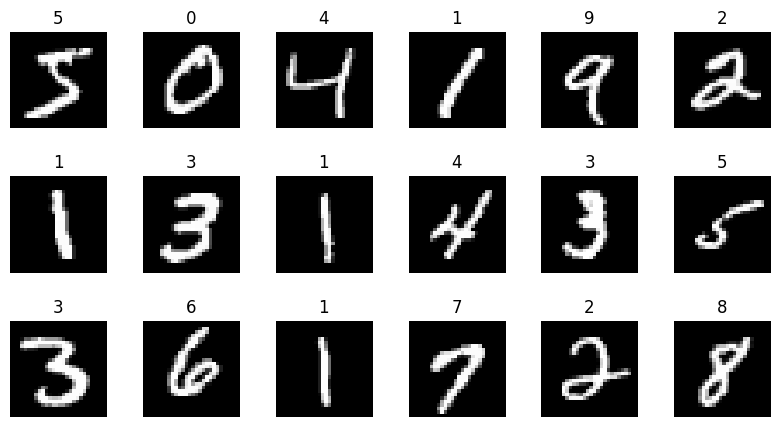

In [ ]:
fig, axes = plt.subplots(3, 6, figsize=(10, 5))
axes = axes.ravel()

for i in np.arange(0, 18):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(f'{y_train[i]}')
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.show()


In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], 28 * 28)
X_test_flat = X_test.reshape(X_test.shape[0], 28 * 28)
print(f"Nowy rozmiar zbioru treningowego: {X_train_flat.shape}")
print(f"Nowy rozmiar zbioru testowego: {X_test_flat.shape}")

X_train_norm = X_train_flat / 255.0
X_test_norm = X_test_flat / 255.0


Nowy rozmiar zbioru treningowego: (60000, 784)
Nowy rozmiar zbioru testowego: (10000, 784)


In [ ]:
#1000 drzew
clf_rf = RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
#redukcja do 500 obrazow

X_train_small = X_train_norm[:500]
y_train_small = y_train[:500]


In [ ]:
#50 obrazów do testowania

X_test_small = X_test_norm[:50]
y_test_small = y_test[:50]


In [ ]:
# Trenowanie modelu
clf_rf.fit(X_train_small, y_train_small)

# Predykcja
y_pred_small = clf_rf.predict(X_test_small)


In [ ]:
# Raport z klasyfikacji
print(classification_report(y_test_small, y_pred_small))

# Macierz błędów
cm = confusion_matrix(y_test_small, y_pred_small)
print(cm)


              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4
           4       0.80      0.89      0.84         9
           5       1.00      0.75      0.86         4
           6       1.00      0.33      0.50         3
           7       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         5

    accuracy                           0.92        50
   macro avg       0.95      0.89      0.89        50
weighted avg       0.94      0.92      0.91        50

[[5 0 0 0 0 0 0 0 0]
 [0 9 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0]
 [1 0 0 0 8 0 0 0 0]
 [0 0 0 0 1 3 0 0 0]
 [1 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 5]]


In [ ]:
incorrect_predictions = np.sum(y_test_small != y_pred_small)
print(f"Liczba niepoprawnie sklasyfikowanych obrazów: {incorrect_predictions}")


Liczba niepoprawnie sklasyfikowanych obrazów: 4


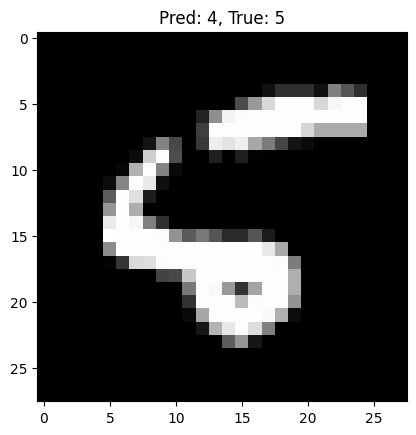

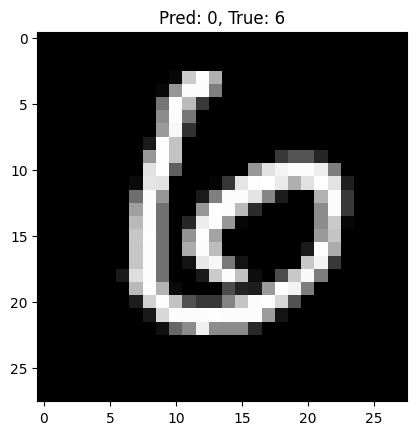

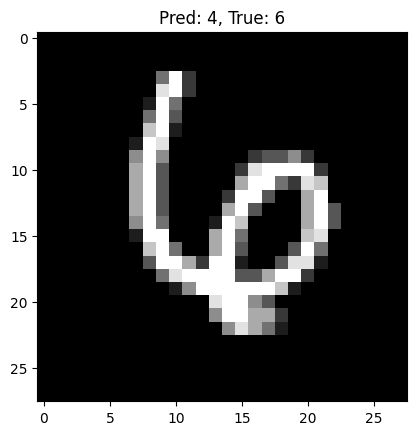

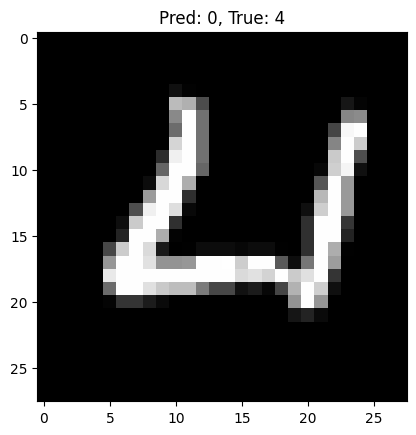

In [ ]:
incorrect_indices = np.where(y_test_small != y_pred_small)[0]

for i, idx in enumerate(incorrect_indices[:5]):
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Pred: {y_pred_small[idx]}, True: {y_test_small[idx]}')
    plt.show()


**PEŁNY ZBIÓR**

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

# Definiujemy klasyfikatory
svc = SVC(kernel='linear')
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=50)
bagging = BaggingClassifier(n_estimators=50)
gboost = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1)


In [ ]:
# Trenowanie klasyfikatorów
svc.fit(X_train_norm, y_train)
#knn.fit(X_train_norm, y_train)
#rf.fit(X_train_norm, y_train)
#bagging.fit(X_train_norm, y_train)
#gboost.fit(X_train_norm, y_train)


KNeighborsClassifier()

In [ ]:
y_pred_svc = svc.predict(X_test_norm)
#y_pred_knn = knn.predict(X_test_norm)
# y_pred_rf = rf.predict(X_test_norm)
# y_pred_bagging = bagging.predict(X_test_norm)
# y_pred_gboost = gboost.predict(X_test_norm)


In [ ]:
print("SVC Classification Report")
print(classification_report(y_test, y_pred_svc))

#print("KNN Classification Report")
#print(classification_report(y_test, y_pred_knn))

# print("Random Forest Classification Report")
# print(classification_report(y_test, y_pred_rf))

# print("Bagging Classification Report")
# print(classification_report(y_test, y_pred_bagging))

# print("Gradient Boosting Classification Report")
# print(classification_report(y_test, y_pred_gboost))


SVC Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.94      0.93      1032
           3       0.91      0.94      0.92      1010
           4       0.94      0.96      0.95       982
           5       0.91      0.90      0.91       892
           6       0.96      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.94      0.90      0.92       974
           9       0.95      0.91      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

KNN Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98   

In [ ]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
# cm_knn = confusion_matrix(y_test, y_pred_knn)
# cm_rf = confusion_matrix(y_test, y_pred_rf)
# cm_bagging = confusion_matrix(y_test, y_pred_bagging)
# cm_gboost = confusion_matrix(y_test, y_pred_gboost)

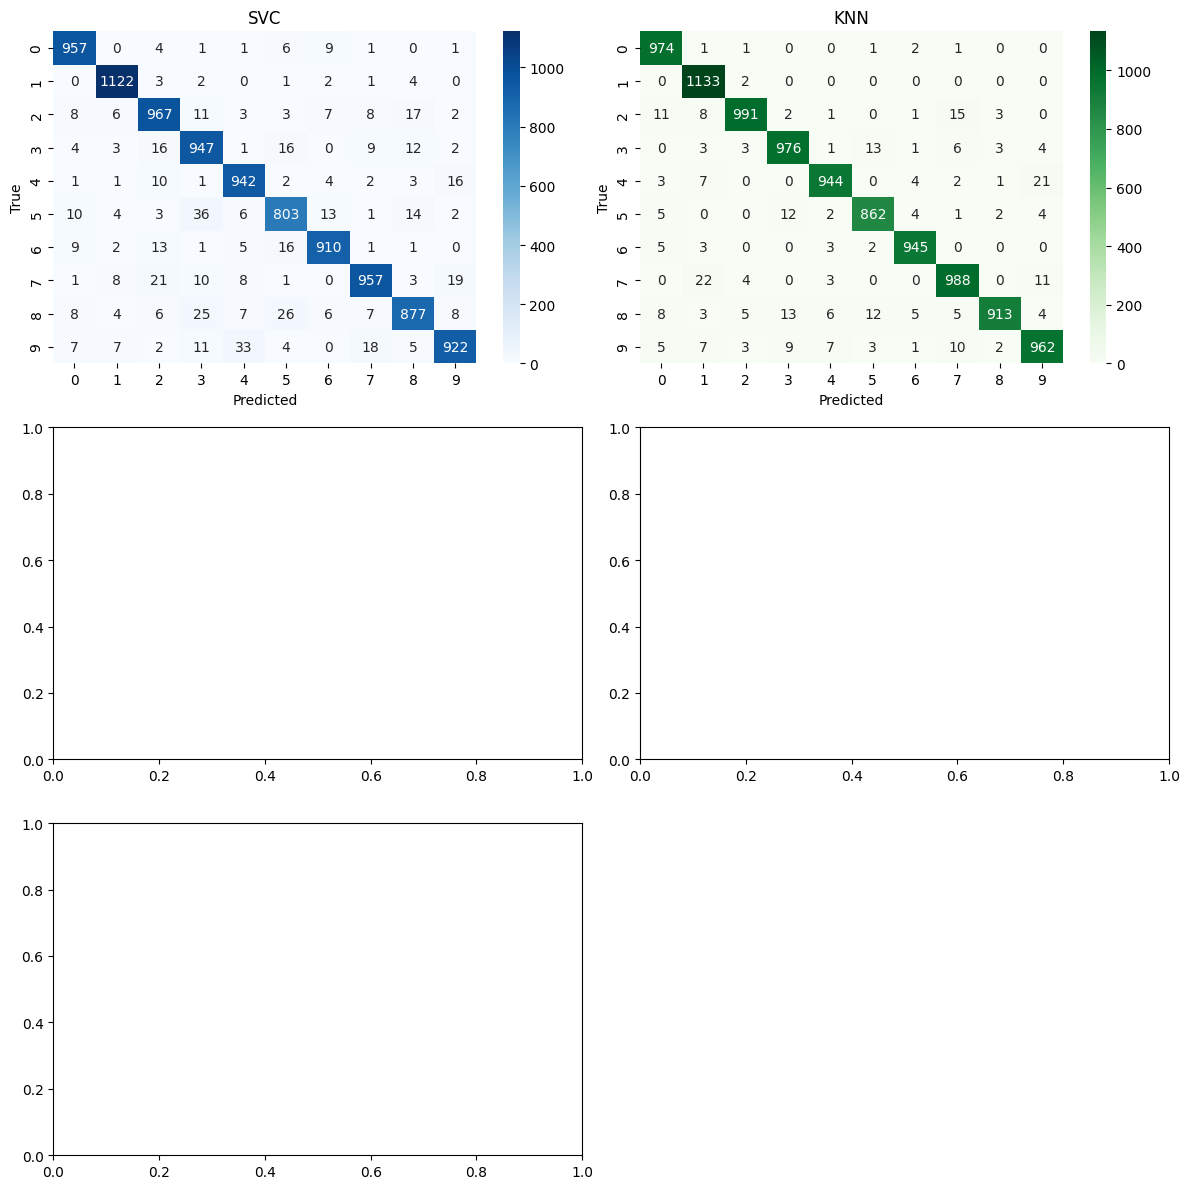

In [ ]:
# Tworzenie figur dla heatmap
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Heatmapa dla SVC
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues", ax=axes[0, 0])
axes[0, 0].set_title("SVC")
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("True")

# # Heatmapa dla KNN
# sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens", ax=axes[0, 1])
# axes[0, 1].set_title("KNN")
# axes[0, 1].set_xlabel("Predicted")
# axes[0, 1].set_ylabel("True")

# # Heatmapa dla Random Forest
# sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges", ax=axes[1, 0])
# axes[1, 0].set_title("Random Forest")
# axes[1, 0].set_xlabel("Predicted")
# axes[1, 0].set_ylabel("True")

# # Heatmapa dla Bagging
# sns.heatmap(cm_bagging, annot=True, fmt="d", cmap="Purples", ax=axes[1, 1])
# axes[1, 1].set_title("Bagging")
# axes[1, 1].set_xlabel("Predicted")
# axes[1, 1].set_ylabel("True")

# # Heatmapa dla Gradient Boosting
# sns.heatmap(cm_gboost, annot=True, fmt="d", cmap="Reds", ax=axes[2, 0])
# axes[2, 0].set_title("Gradient Boosting")
# axes[2, 0].set_xlabel("Predicted")
# axes[2, 0].set_ylabel("True")

# Ukrycie pustego subplotu
fig.delaxes(axes[2, 1])

# Ustawienie odstępów między subplotami
plt.tight_layout()
plt.show()
